# Rozpoznawanie obiektów - przetwarzanie obrazów

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

## Sprawy techniczne

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Wyświetl obraz
def show(img):
    fig = plt.figure()
    # sprawdź rozmiar obrazu
    shp = len(img.shape)
    ax = fig.add_axes([0, 0, 1, 1])
    # dla kolorowych zmień kanały BGR-RGB
    if shp == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
    # dla szaroodcieniowych po prostu wyświetl
    else:
        ax.imshow(img, cmap=plt.cm.gray, vmin=0, vmax=255)

### Ładowanie obrazów

OpenCV: [cv2.imread(filename[, flags])](http://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html?highlight=imread#imread)

sx: 650 sy: 380 channels: 3


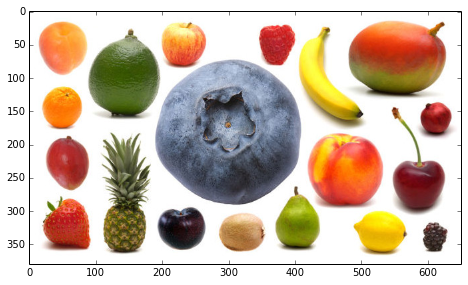

In [3]:
img = cv2.imread("img/fruits.jpg")
show(img)
(sy, sx, ch) = img.shape
print "sx:", sx, "sy:", sy, "channels:", ch

## Przestrzenie barw

### Teoria

* każdy kolor można przedstawić jako sumę conajwyżej trzech niezależnych składowych
* przestrzenie addytywne i subtraktywne

### Konwersje kolorystyczne w OpenCV

[cv2.cvtColor(src, code[, dst[, dstCn]])](http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor)

### Jak powstaje kolor na zdjęciu

![](img/bayer.jpg)

### RGB

![](img/rgb_object.jpg)

#### Uwagi

OpenCV domyślnie ładuje obrazy w układzie **BGR**

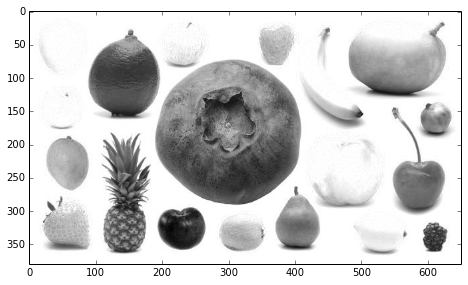

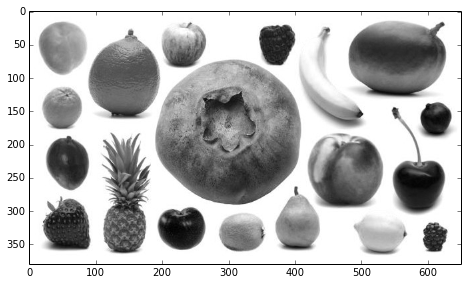

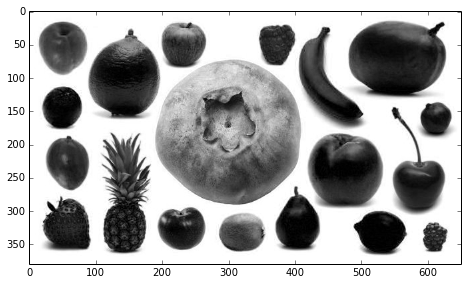

In [4]:
show(img[:,:,2])
show(img[:,:,1])
show(img[:,:,0])

### Przestrzeń HSV

![](img/color_space_hsv.jpg) 

![](img/photoshop-color-picker.jpg)

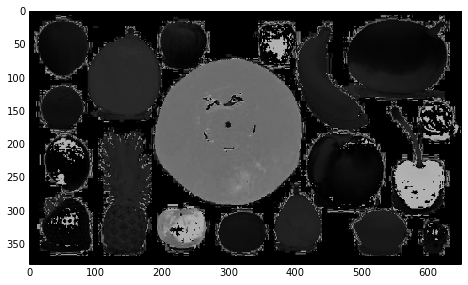

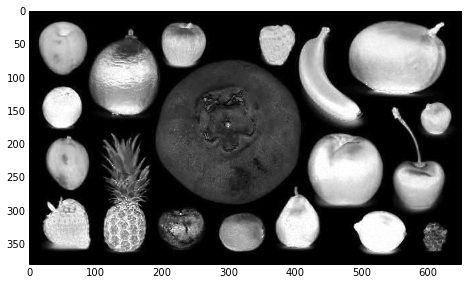

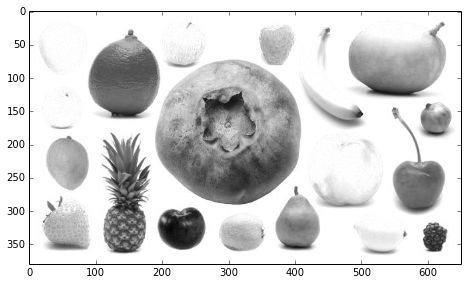

In [6]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(hsv[:,:,0])
show(hsv[:,:,1])
show(hsv[:,:,2])

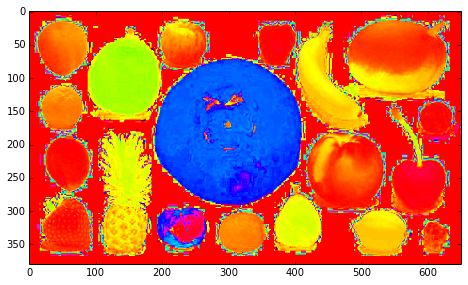

In [7]:
hvis = hsv.copy()
hvis[:,:,1] = 255*np.ones((sy, sx))
hvis[:,:,2] = 255*np.ones((sy, sx))
hvis = cv2.cvtColor(hvis, cv2.COLOR_HSV2BGR)
show(hvis)

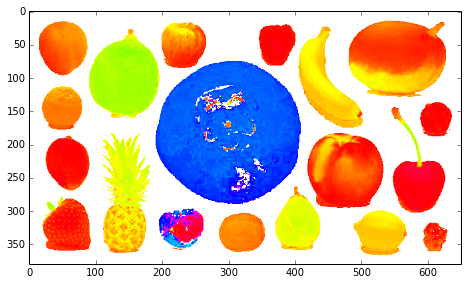

In [8]:
hvis2 = hsv.copy()
[_, hvis2[:,:,1]] = cv2.threshold(hsv[:,:,1], 30, 255, cv2.THRESH_BINARY)
hvis2[:,:,2] = 255*np.ones((sy, sx))
hvis2 = cv2.cvtColor(hvis2, cv2.COLOR_HSV2BGR)
show(hvis2)

### Przestrzeń HSL

![](img/hsl_img_2.jpg)

![](img/paint_color.jpg)

![](img/gimp.jpg)

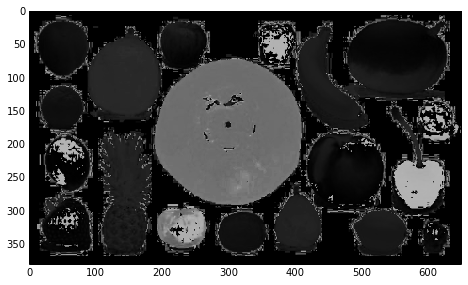

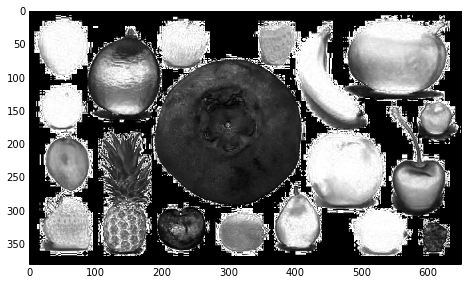

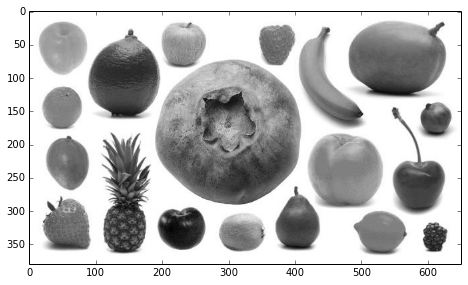

In [5]:
hsl = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
show(hsl[:,:,0])
show(hsl[:,:,2])
show(hsl[:,:,1])

## Operacje punktowe

### Definicja

$$\forall{x,y}\;I[x,y] = fun(I[x,y])$$

### Progowanie

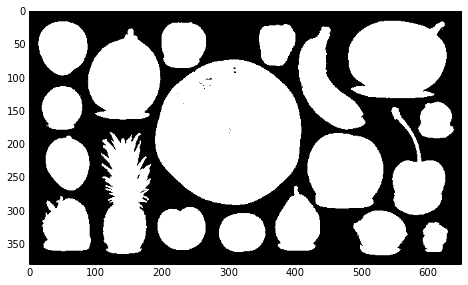

In [9]:
thr = np.zeros((sy, sx), np.uint8)
for y in range(sy):
    for x in range(sx):
        if img[y,x,0] < 230:
            thr[y,x] = 255
        else:
            thr[y,x] = 0

show(thr)

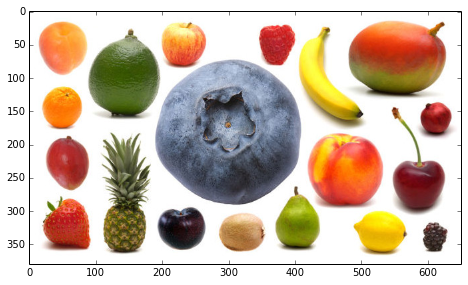

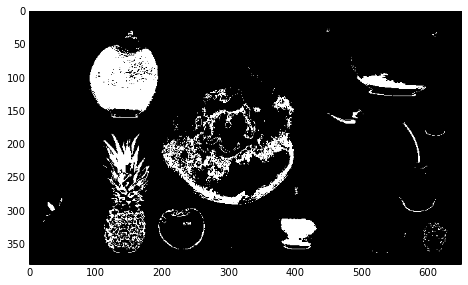

In [10]:
thr2 = np.zeros((sy, sx), np.uint8)
for y in range(sy):
    for x in range(sx):
        r = img[y,x,2]
        g = img[y,x,1]
        b = img[y,x,0]
        if r < 128 and g > 80 and b < 128:
            thr2[y,x] = 255
        else:
            thr2[y,x] = 0

show(img)
show(thr2)

### Skala barwy H

![](img/HueScale.png)

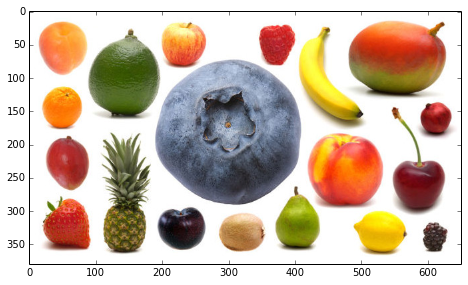

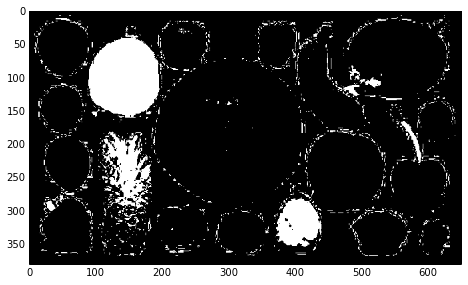

In [17]:
thr3 = np.zeros((sy, sx), np.uint8)
for y in range(sy):
    for x in range(sx):
        h = hsv[y,x,0]
        s = hsv[y,x,1]
        v = hsv[y,x,2]
        if h > 30 and h < 90:
            thr3[y,x] = 255
        else:
            thr3[y,x] = 0

show(img)
show(thr3)

### Zmiana jasności

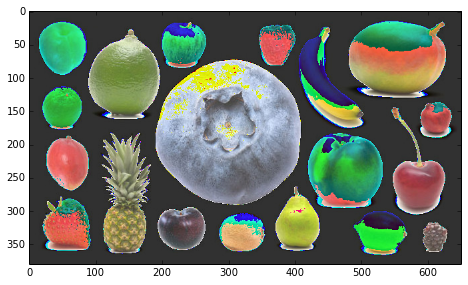

In [18]:
val = 50

br = img.copy()
br = br + val
show(br)

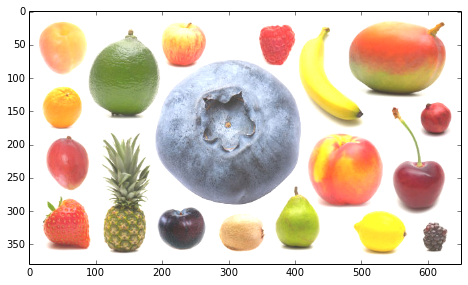

In [19]:
br2 = img.copy()
br2[:,:,0] = cv2.add(br2[:,:,0], val);
br2[:,:,1] = cv2.add(br2[:,:,1], val);
br2[:,:,2] = cv2.add(br2[:,:,2], val);
show(br2)

## Operacje obszarowe

### Definicja

* wartość zależy od wartości piksela **oraz jego otoczenia**
* filtry rankingowe
* filtry macierzowe

### Rozmycie

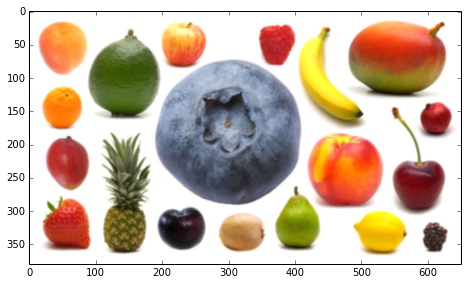

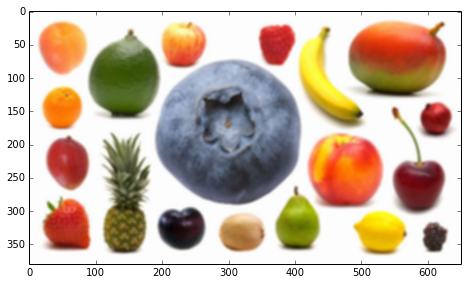

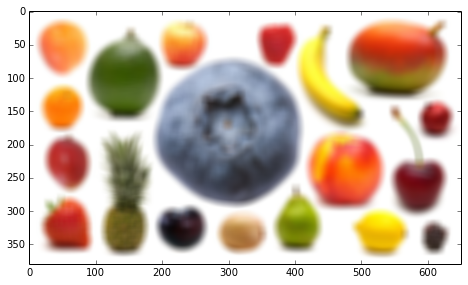

In [20]:
blur1 = cv2.GaussianBlur(img, (3, 3), 3)
show(blur1)
blur2 = cv2.GaussianBlur(img, (5, 5), 5)
show(blur2)
blur3 = cv2.GaussianBlur(img, (13, 13), 20)
show(blur3)

### Operacje morfologiczne

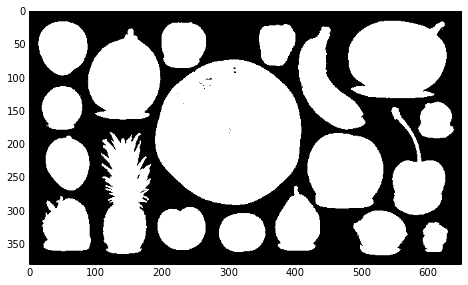

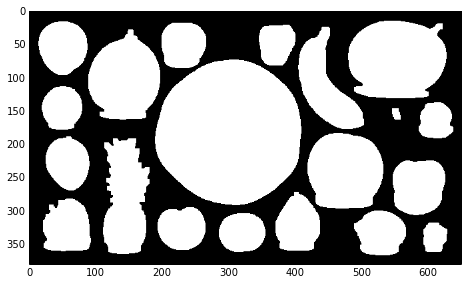

In [50]:
show(thr)
kernel = np.ones((3,3),np.uint8)
#kernel = np.array([ [0,1,1,1,0],
#                    [1,1,1,1,1],
#                    [1,1,1,1,1],
#                    [1,1,1,1,1],
#                    [0,1,1,1,0] ], np.uint8)

opn = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, kernel, iterations = 1)
opn = cv2.morphologyEx(opn, cv2.MORPH_OPEN, kernel, iterations = 3)
show(opn)

## Detekcja krawędzi

[OpenCV::Canny](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html)

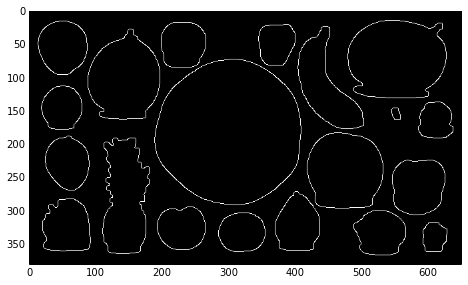

In [51]:
edges = opn.copy()
edges = cv2.Canny(edges, 120, 220)
show(edges)

## Segmentacja obrazu - detekcja konturów

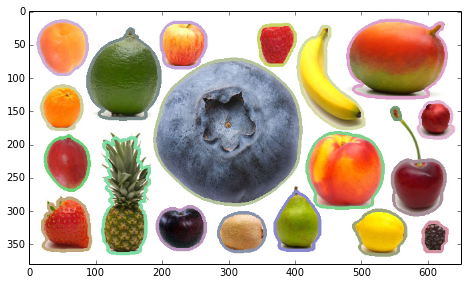

In [52]:
all_contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
edge_img = img.copy()
for i in range(len(all_contours)):
    r = np.random.randint(100, 228)
    g = np.random.randint(100, 228)
    b = np.random.randint(100, 228)
    cv2.drawContours(edge_img, all_contours, i, (b, g, r), 3)
    # Filled
    #cv2.drawContours(edge_img, all_contours, i, (b, g, r), -1)
show(edge_img)

### Wykorzystanie masek obrazu - przenieść wyżej!

In [36]:
def get_mask(img):
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    _, thr = cv2.threshold(hls[:,:,1], 230, 255, cv2.THRESH_BINARY_INV)
    return thr

def calc_mean_color(img, mask):
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    mean_h = cv2.mean(hls[:,:,0], mask)
    hist = cv2.calcHist([hls[:,:,0]], [0], mask, [30], [0, 180])
    #plt.figure()
    #plt.bar(range(30), hist)
    hmax = 0
    imax = 0
    for i in range(len(hist)):
        if hist[i] > hmax:
            hmax = hist[i]
            imax = i
    #return mean_h[0]
    return 1.0 /180 * imax * 6

fruits = ["lemon", "banana", "orange", "apple"]
for f in fruits:
    path = "img/fruits/" + f + ".jpg"
    fimg = cv2.imread(path)
    mask = get_mask(fimg)
    col = calc_mean_color(fimg, mask)
    print "Mean color for", f, "is", col


Mean color for lemon is 0.1
Mean color for banana is 0.1
Mean color for orange is 0.0666666666667
Mean color for apple is 0.2


### Momenty geometryczne

$$m_{ji}=\sum_{x,y}img(x,y)\cdot x^j \cdot y^i$$

* $m_{00}$ - pole powierzchni 

### Momenty centralne

Wartość momentów centralnych nie zależy od położenia obiektu na obrazie

$$mu_{ji}=\sum_{x,y}img(x,y)\cdot (x-\bar{x})^j \cdot (y-\bar{y})^i$$

$$\bar{x} = \frac{m_{10}}{m_{00}}\;\;\;\;\bar{y} = \frac{m_{01}}{m_{00}}$$

### Momenty znormalizowane

Wartość momentów znormalizowanych nie zależy od powierzchni obiektu

$$nu_{ji} = \frac{mu_{ji}}{m_{00}^{(i+j)/2+1}}$$

In [37]:
fruits = ["lemon", "banana", "orange", "apple"]

def calc_circularity(contour):
    mom = cv2.moments(contour)
    perim = cv2.arcLength(contour, True)
    circ = 4 * 3.14 * mom["m00"] / (perim*perim)
    return circ

for f in fruits:
    path = "img/fruits/" + f + ".jpg"
    fimg = cv2.imread(path)
    mask = get_mask(fimg)
    contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(fimg, contours, 0, (255, 0, 0), 3)
    #show(img)
    print "Circularity of", f, "is", calc_circularity(contours[0])

Circularity of lemon is 0.826171162855
Circularity of banana is 0.368121892147
Circularity of orange is 0.89168532347
Circularity of apple is 0.835161231035


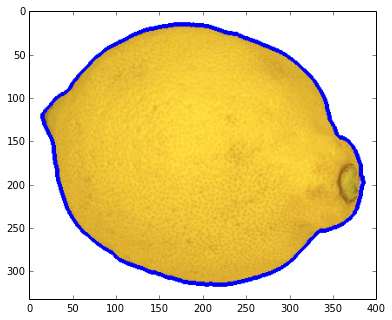

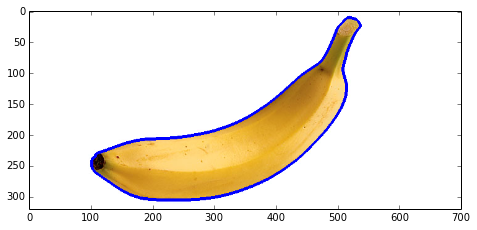

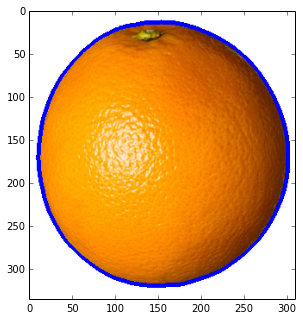

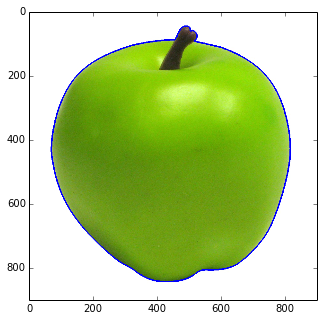

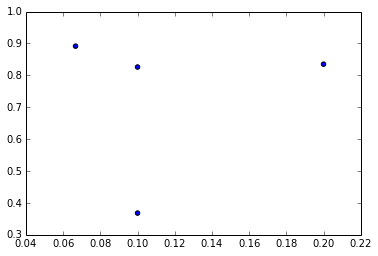

In [38]:
features = []

for f in fruits:
    path = "img/fruits/" + f + ".jpg"
    fimg = cv2.imread(path)
    mask = get_mask(fimg)
    contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(fimg, contours, 0, (255, 0, 0), 3)
    col = calc_mean_color(fimg, mask)
    circ = calc_circularity(contours[0])
    features.append([col, circ])
    show(fimg)
    
x_list = [x for [x,y] in features]
y_list = [y for [x,y] in features]
plt.figure()
plt.scatter(x_list, y_list)

Contour 10 : 181.0


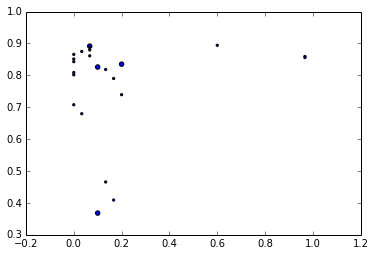

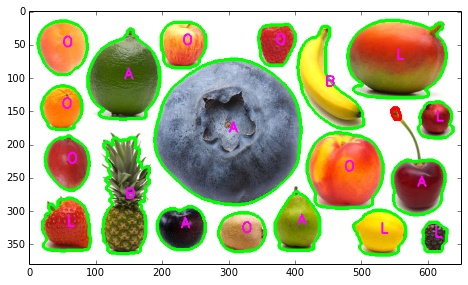

In [65]:


def find_closest(obj, labels, features):
    mindist = None
    minid = None
    for i in range(len(features)):
        acc = 0
        for j in range(len(obj)):
            diff = obj[j] - features[i][j]
            acc = acc + diff*diff
        dist = acc
        #print "Dist to", labels[i], dist
        if not mindist or dist < mindist:
            mindist = dist
            minid = i
            
    return minid, mindist

final_img = img.copy()

objects = []
for i in range(len(all_contours)):
    cont = all_contours[i]
    cv2.drawContours(final_img, all_contours, i, (0, 255, 0), 3)
    if cv2.contourArea(cont) < 500:
        print "Contour", i, ":", cv2.contourArea(cont)
        cv2.drawContours(final_img, all_contours, i, (0, 0, 255), 3)
        continue
    mom = cv2.moments(cont)
    mx = mom["m10"] / mom["m00"]
    my = mom["m01"] / mom["m00"]
    mask_img = np.zeros((sy, sx), np.uint8)
    cv2.drawContours(mask_img, [cont], 0, (255), -1)
    #show(mask_img)
    feat = [calc_mean_color(img, mask_img), calc_circularity(cont)]
    objects.append(feat)
    
    mid, mdist = find_closest(feat, fruits, features)
    cv2.putText(final_img, fruits[mid][0].upper(), (int(mx), int(my)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 255), 2)
    #cv2.putText(final_img, str(i) + "/" + str(0.01*int(feat[0]*100)), (int(mx), int(my)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 255), 2)
    
x_list = [x for [x,y] in features]
y_list = [y for [x,y] in features]
plt.figure()
plt.scatter(x_list, y_list)

ox_list = [x for [x,y] in objects]
oy_list = [y for [x,y] in objects]
plt.scatter(ox_list, oy_list, marker = '.')
show(final_img)